In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import imagehash
import requests
from io import BytesIO

In [2]:
data = pd.read_csv('Anime_data.csv', delimiter = ',')
data.head(5) # print first 5 rows of the dataframe

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,TV,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,TV,NaN,['Toei Animation'],7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet


We only want to build recommender based on the genre and the type, so let's focus only to those feature.



In [3]:
data.isnull().sum()

Anime_id         0
Title            0
Genre         2012
Synopsis      1419
Type           634
Producer      9367
Studio        9083
Rating        2577
ScoredBy      3775
Popularity     634
Members          0
Episodes      2917
Source        1927
Aired          634
Link           634
dtype: int64

In [4]:
data.loc[data['Rating'].isnull(), 'Rating'] = 0.0
data['Rating'].isnull().any()

False

<AxesSubplot:>

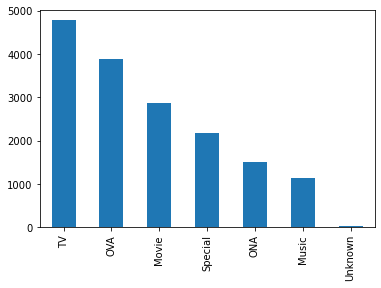

In [5]:
data['Type'].value_counts().plot.bar()

In [6]:
data.loc[(data['Episodes']=="Unknown") & (data['Type'].isnull())].head()

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link


In [7]:
missing = data.loc[(data['Episodes']=="Unknown") & (data['Type'].isnull())].copy()
missing.shape

(0, 15)

In [8]:
missing.head(25)

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link


In [9]:
data.isnull().sum()

Anime_id         0
Title            0
Genre         2012
Synopsis      1419
Type           634
Producer      9367
Studio        9083
Rating           0
ScoredBy      3775
Popularity     634
Members          0
Episodes      2917
Source        1927
Aired          634
Link           634
dtype: int64

In [10]:
data.dropna(subset=['Type'], inplace=True)
#data.dropna(subset=['Synopsis'], inplace=True)
#data.dropna(subset=['Producer'], inplace=True)
#data.dropna(subset=['Studio'], inplace=True)
data.dropna(subset=['Popularity'], inplace=True)
data.shape

(15735, 15)

In [11]:
data['Genre'].fillna('Unknown', inplace=True)
data['Synopsis'].fillna('Unknown', inplace=True)
data['Producer'].fillna('Unknown', inplace=True)
data['Studio'].fillna('Unknown', inplace=True)
data['Episodes'].fillna('Unknown', inplace=True)
data['Source'].fillna('Unknown', inplace=True)
data['Aired'].fillna('Unknown', inplace=True)
data['Link'].fillna('Unknown', inplace=True)
data.isnull().any()

Anime_id      False
Title         False
Genre         False
Synopsis      False
Type          False
Producer      False
Studio        False
Rating        False
ScoredBy       True
Popularity    False
Members       False
Episodes      False
Source        False
Aired         False
Link          False
dtype: bool

In [12]:
data.loc[(data['Genre'].isnull())].head()

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link


In [13]:
data.loc[data['ScoredBy'].isnull(), 'ScoredBy'] = 0.0
data['ScoredBy'].isnull().any()

data.loc[data['Popularity'].isnull(), 'Popularity'] = 0.0
data['Popularity'].isnull().any()

False

In [14]:
data.isnull().sum()

Anime_id      0
Title         0
Genre         0
Synopsis      0
Type          0
Producer      0
Studio        0
Rating        0
ScoredBy      0
Popularity    0
Members       0
Episodes      0
Source        0
Aired         0
Link          0
dtype: int64

In [15]:
data

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,TV,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,TV,Unknown,['Toei Animation'],7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16963,10321,Uta no☆Prince-sama♪ Maji Love 1000%,Unknown,"Haruka Nanami, an aspiring composer from the c...",TV,Unknown,Unknown,7.37,0.0,757.0,146027.0,Unknown,Unknown,"Jul 3, 2011 to Sep 24, 2011",https://myanimelist.net/anime/10321/Uta_no%E2%...
16964,1259,Saint Seiya: Tenkai-hen Josou - Overture,Unknown,"After the Saints' victory against Hades, Seiya...",Movie,Unknown,Unknown,7.42,0.0,3456.0,17063.0,Unknown,Unknown,"Feb 14, 2004",https://myanimelist.net/anime/1259/Saint_Seiya...
16965,713,Air Movie,Unknown,"Centuries ago, Kanna, a princess and the last ...",Movie,Unknown,Unknown,7.39,0.0,1852.0,51873.0,Unknown,Unknown,"Feb 5, 2005",https://myanimelist.net/anime/713/Air_Movie
16966,13599,Robotics;Notes,Unknown,It has always been the aspiration of the Centr...,TV,Unknown,Unknown,7.43,0.0,760.0,145630.0,Unknown,Unknown,"Oct 12, 2012 to Mar 22, 2013",https://myanimelist.net/anime/13599/Robotics_N...


## Calculate Weighted Rating
Maybe it is also a good idea to show the weighted rating to the user whenever they query for similiar anime. We can improve the recommendation by sorting the recommendation based on their respective weighted rating.

In [16]:
m = data.Members.quantile(0.75)
C = data.Rating.mean()
print(m, C)

8909.0 5.708474102319677


In [17]:
def weighted_rating(df, m, C):
    term = df['Members'] / (m + df['Members'])
    return df['Rating'] * term + (1-term) * C

In [18]:
data['community_rating'] = data.apply(weighted_rating, axis=1, args=(m,C))
data.head()

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link,community_rating
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop,8.771268
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...,8.282527
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun,8.249267
3,7,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,TV,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...,7.166544
4,8,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,TV,Unknown,['Toei Animation'],7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet,6.451462


## Dropping some unused columns
these are the features that will be dropped:

anime_id -> just the index of the anime, it is easier if we used the panda's index
rating -> we have weighted rating (community_rating)
members -> we have weighted rating (community_rating)
episodes -> the data that we have is not updated with the current airing anime, and some anime is still airing (One Piece, etc)

In [19]:
data.columns

Index(['Anime_id', 'Title', 'Genre', 'Synopsis', 'Type', 'Producer', 'Studio',
       'Rating', 'ScoredBy', 'Popularity', 'Members', 'Episodes', 'Source',
       'Aired', 'Link', 'community_rating'],
      dtype='object')

In [20]:
data.drop(['Anime_id', 'Type', 'ScoredBy', 'Popularity', 'Members', 'Episodes', 'Source',
       'Aired', 'Link'], axis=1, inplace=True)
data.head()

,Title,Genre,Synopsis,Producer,Studio,Rating,community_rating
0,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",['Bandai Visual'],['Sunrise'],8.81,8.771268
1,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...","['Sunrise', 'Bandai Visual']",['Bones'],8.41,8.282527
2,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",['Victor Entertainment'],['Madhouse'],8.31,8.249267
3,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,['Bandai Visual'],['Sunrise'],7.34,7.166544
4,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,Unknown,['Toei Animation'],7.04,6.451462


In [21]:
data.isnull().sum()

Title               0
Genre               0
Synopsis            0
Producer            0
Studio              0
Rating              0
community_rating    0
dtype: int64

In [22]:
data.shape

(15735, 7)

## Process the categorical columns

In [23]:

from pyspark.ml.feature import StringIndexer
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize

In [24]:
data.columns

Index(['Title', 'Genre', 'Synopsis', 'Producer', 'Studio', 'Rating',
       'community_rating'],
      dtype='object')

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/roland/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# Tokenize les données textuelles
data["Synopsis_tokenized"] = data["Synopsis"].apply(word_tokenize)
data["Genre_tokenized"] = data["Genre"].apply(word_tokenize)

In [27]:
# Entraîner le modèle Word2Vec sur les données tokenized
model = Word2Vec(data["Synopsis_tokenized"], window=5, min_count=1)
model1 = Word2Vec(data["Genre_tokenized"], window=5, min_count=1)

In [28]:
# Pour chaque paragraphe, faire la somme des vecteurs de mots et normaliser
#df["Synopsis_vectorized"] = df["Synopsis_tokenized"].apply(lambda x: (sum(model[word])/len(x) for word in x)).tolist()
data["Synopsis_vectorized"] = data["Synopsis_tokenized"].apply(lambda x: [sum(model.wv[word])/len(x) for word in x]).tolist()
data["Genre_vectotized"] = data["Genre_tokenized"].apply(lambda x: [sum(model1.wv[word])/len(x) for word in x]).tolist()


In [29]:
data =data.drop('Genre_tokenized', axis=1)

In [30]:
data

,Title,Genre,Synopsis,Producer,Studio,Rating,community_rating,Synopsis_tokenized,Synopsis_vectorized,Genre_vectotized
0,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",['Bandai Visual'],['Sunrise'],8.81,8.771268,"[In, the, year, 2071, ,, humanity, has, coloni...","[-0.008956105519114927, -0.029370625100108152,...","[0.09031729130564552, 0.030437560386513053, 0...."
1,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...","['Sunrise', 'Bandai Visual']",['Bones'],8.41,8.282527,"[Another, day, ,, another, bounty—such, is, th...","[0.02154468426128804, 0.006317419418781178, -0...","[0.10725178342545405, 0.03614460295898425, 0.0..."
2,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",['Victor Entertainment'],['Madhouse'],8.31,8.249267,"[Vash, the, Stampede, is, the, man, with, a, $...","[0.004141812452357356, -0.028777279138489806, ...","[0.09031729130564552, 0.030437560386513053, 0...."
3,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,['Bandai Visual'],['Sunrise'],7.34,7.166544,"[Witches, are, individuals, with, special, pow...","[0.01759864378784021, 0.10053069910711863, 0.0...","[0.09031729130564552, 0.030437560386513053, 0...."
4,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,Unknown,['Toei Animation'],7.04,6.451462,"[It, is, the, dark, century, and, the, people,...","[-0.10467637254813918, -0.013135575598069266, ...","[0.1320021949851742, 0.12815467534192765, 0.08..."
...,...,...,...,...,...,...,...,...,...,...
16963,Uta no☆Prince-sama♪ Maji Love 1000%,Unknown,"Haruka Nanami, an aspiring composer from the c...",Unknown,Unknown,7.37,7.274460,"[Haruka, Nanami, ,, an, aspiring, composer, fr...","[0.0027858388138665533, 0.02077089411842801, -...",[0.12844577633950394]
16964,Saint Seiya: Tenkai-hen Josou - Overture,Unknown,"After the Saints' victory against Hades, Seiya...",Unknown,Unknown,7.42,6.832907,"[After, the, Saints, ', victory, against, Hade...","[0.029105358571175112, -0.04416977728233319, 0...",[0.12844577633950394]
16965,Air Movie,Unknown,"Centuries ago, Kanna, a princess and the last ...",Unknown,Unknown,7.39,7.143534,"[Centuries, ago, ,, Kanna, ,, a, princess, and...","[0.0009243677927449701, 0.010480231354283593, ...",[0.12844577633950394]
16966,Robotics;Notes,Unknown,It has always been the aspiration of the Centr...,Unknown,Unknown,7.43,7.330756,"[It, has, always, been, the, aspiration, of, t...","[-0.07414576388826524, -0.01537275139384696, -...",[0.12844577633950394]


In [31]:
le = LabelEncoder()
data["Title"] = le.fit_transform(data["Title"])
data["Genre"] = le.fit_transform(data["Genre"])
data["Producer"] = le.fit_transform(data["Producer"])
data["Studio"] = le.fit_transform(data["Studio"])
data

,Title,Genre,Synopsis,Producer,Studio,Rating,community_rating,Synopsis_tokenized,Synopsis_vectorized,Genre_vectotized
0,2322,28,"In the year 2071, humanity has colonized sever...",555,648,8.81,8.771268,"[In, the, year, 2071, ,, humanity, has, coloni...","[-0.008956105519114927, -0.029370625100108152,...","[0.09031729130564552, 0.030437560386513053, 0...."
1,2324,1474,"Another day, another bounty—such is the life o...",2297,108,8.41,8.282527,"[Another, day, ,, another, bounty—such, is, th...","[0.02154468426128804, 0.006317419418781178, -0...","[0.10725178342545405, 0.03614460295898425, 0.0..."
2,14111,1282,"Vash the Stampede is the man with a $$60,000,0...",2868,350,8.31,8.249267,"[Vash, the, Stampede, is, the, man, with, a, $...","[0.004141812452357356, -0.028777279138489806, ...","[0.09031729130564552, 0.030437560386513053, 0...."
3,14813,1014,Witches are individuals with special powers li...,555,648,7.34,7.166544,"[Witches, are, individuals, with, special, pow...","[0.01759864378784021, 0.10053069910711863, 0.0...","[0.09031729130564552, 0.030437560386513053, 0...."
4,1529,1879,It is the dark century and the people are suff...,0,705,7.04,6.451462,"[It, is, the, dark, century, and, the, people,...","[-0.10467637254813918, -0.013135575598069266, ...","[0.1320021949851742, 0.12815467534192765, 0.08..."
...,...,...,...,...,...,...,...,...,...,...
16963,14507,0,"Haruka Nanami, an aspiring composer from the c...",0,0,7.37,7.274460,"[Haruka, Nanami, ,, an, aspiring, composer, fr...","[0.0027858388138665533, 0.02077089411842801, -...",[0.12844577633950394]
16964,11577,0,"After the Saints' victory against Hades, Seiya...",0,0,7.42,6.832907,"[After, the, Saints, ', victory, against, Hade...","[0.029105358571175112, -0.04416977728233319, 0...",[0.12844577633950394]
16965,327,0,"Centuries ago, Kanna, a princess and the last ...",0,0,7.39,7.143534,"[Centuries, ago, ,, Kanna, ,, a, princess, and...","[0.0009243677927449701, 0.010480231354283593, ...",[0.12844577633950394]
16966,11369,0,It has always been the aspiration of the Centr...,0,0,7.43,7.330756,"[It, has, always, been, the, aspiration, of, t...","[-0.07414576388826524, -0.01537275139384696, -...",[0.12844577633950394]


In [41]:
data.shape

(15735, 10)

In [42]:
import numpy as np

# Calculate correlation matrix
corr = data.corr()

# Select highly correlated features
high_corr = corr[((corr > 0.05) | (corr < -0.05)) & (corr < 1)]

# For each feature, list its correlated feature
correlated_columns = {}
for col in high_corr.columns:
    correlated_features = high_corr.columns[(~high_corr[col].isna())].tolist()
    correlated_features = list(set(correlated_features).difference(set(correlated_columns.keys())))
    correlated_columns[col] = correlated_features

# From correlated features with TARGET, select their top 3 correlated features
selected_features = correlated_columns["Rating"]
for feature in selected_features.copy():
    correlated_correlated_features = high_corr[feature].abs().sort_values(ascending=False)
    features_to_select = correlated_correlated_features[(correlated_correlated_features > 0.1) & (correlated_correlated_features < 0.9)][:3].index.tolist()
    selected_features.extend(features_to_select)
data = data.loc[:, np.unique(selected_features)]
data

,Rating,Studio,Synopsis,community_rating
0,8.81,648,108,8.771268
1,8.41,108,86,8.282527
2,8.31,350,92,8.249267
3,7.34,648,43,7.166544
4,7.04,705,54,6.451462
...,...,...,...,...
16963,7.37,0,73,7.274460
16964,7.42,0,56,6.832907
16965,7.39,0,88,7.143534
16966,7.43,0,93,7.330756


## Build The Decision Tree Model

In [57]:
# Importer les bibliothèques nécessaires
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Séparer les données en entrées (X)
X = data.drop(columns=["Rating"])

# Séparer les données en cibles (y)
y = data["Rating"]

# Séparation :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle
gb_reg = GradientBoostingRegressor()

# Entraîner le modèle
gb_reg.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = gb_reg.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared: ", r2)


Mean squared error:  0.5458237820078872
R-squared:  0.8752742672748095
